# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

N_PONTOS_TOTAL = 1000

# Criando a reta
n1, n2 = np.random.uniform(-1, 1, 2)
p1 = [n1, n2]

n1, n2 = np.random.uniform(-1, 1, 2)
p2 = [n1, n2]

# Coeficiente angular (m = (y2 -y1) / (x2 - x1))
m = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Coeficiente linear (b = y - mx)
b = p1[1] - m*p1[0]

data = [] # dataset
y = []
for i in range(N_PONTOS_TOTAL):
    n1, n2 = np.random.uniform(-1, 1, 2)
    x = [n1, n2]
    data.append(x)
    
    # Funcao alvo
    f_x = m * n1 + b 
    
    # Mapeia os pontos de acordo com a reta
    if ( (aux := np.sign(m*n1 - n2 + b)) != 0):    
        y.append(aux) # Equacao geral da reta

### Visualizando o dataset

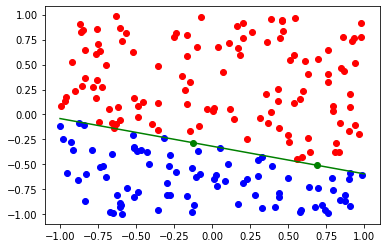

In [ ]:
line = np.linspace(-1, 1, 1000) 
plt.plot(line, m*line + b, label="f(x)", c="green")

# Pontos usados na criacao da reta
plt.scatter(p1[0], p1[1], c='green')
plt.scatter(p2[0], p2[1], c='green')

for i in range(len(data[:200])):
    if (y[i] == 1):
        plt.scatter(data[i][0], data[i][1], c='blue')
    else:        
        plt.scatter(data[i][0], data[i][1], c='red')

plt.show()    

### Algoritmo PLA

In [1]:
def algoritmo_PLA(X, Y):
    w = [0, 0, 0]
    erros = True

    while erros:
        erros = False

        for i in range(len(X)):
            xi = [1] + X[i]
            yi = Y[i]

            if np.sign(np.dot(w, xi)) != np.sign(yi):
                w = np.add(w, np.dot(yi, xi))
                erros = True

    return w


### Função para visualização dos passos do PLA

In [ ]:
%matplotlib inline
def plotGrafico(data, w, y, f):    
    nPontos = len(data)    
    #matplotlib.use('TkAgg')    
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [data[i][0] for i in range(nPontos)]
    y_plt = [data[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)  


### Função para construir lista de pontos classificados incorretamente

In [2]:
def constroiListaPCI(X, Y, w):
    incorretos = []
    
    for i in range(len(X)):
        xi = [1] + X[i]
        yi = Y[i]
        
        if np.sign(np.dot(w, xi)) != np.sign(yi):
            incorretos.append(i)
    
    return np.array(incorretos)


### Calculando a acurácia

In [11]:
def separa_dados_treino_teste(X, Y, proporcao_teste):
    n_teste = int(proporcao_teste * len(X))
    indices_aleatorios = np.random.permutation(len(X))
    indices_teste = indices_aleatorios[:n_teste]
    indices_treino = indices_aleatorios[n_teste:]
    X_treino = X[indices_treino]
    Y_treino = Y[indices_treino]
    X_teste = X[indices_teste]
    Y_teste = Y[indices_teste]
    return X_treino, Y_treino, X_teste, Y_teste

def dados_treino_teste(X, Y, proporcao_teste):
    n_amostras, n_caracteristicas = X.shape
    X_com_bias = np.hstack((np.ones((n_amostras, 1)), X))
    dados = np.hstack((X_com_bias, Y.reshape(-1, 1)))
    np.random.shuffle(dados)
    indice_separacao = int((1 - proporcao_teste) * n_amostras)
    dados_treino, dados_teste = dados[:indice_separacao], dados[indice_separacao:]
    X_treino, Y_treino = dados_treino[:, :-1], dados_treino[:, -1]
    X_teste, Y_teste = dados_teste[:, :-1], dados_teste[:, -1]
    return X_treino, Y_treino, X_teste, Y_teste

def transforma_dados(X, y):
    N = len(X)
    X_transformado = np.hstack((np.ones((N, 1)), X))
    y_transformado = np.array(y)
    return X_transformado, y_transformado



In [12]:
def transforma_dados(X, Y):
    N = len(X)
    X_transformado = np.hstack((np.ones((N, 1)), X))
    Y_transformado = np.array(Y)
    return X_transformado, Y_transformado
